#### Carregamento de dados

In [1]:
%run bot_libraries.ipynb

In [2]:
data = pd.read_csv("CryptoBot_202103006Mv001.csv")

In [3]:
%run tratamento_de_dados.ipynb

#### Gráfico 'Open', 'High', 'Low', 'Close'

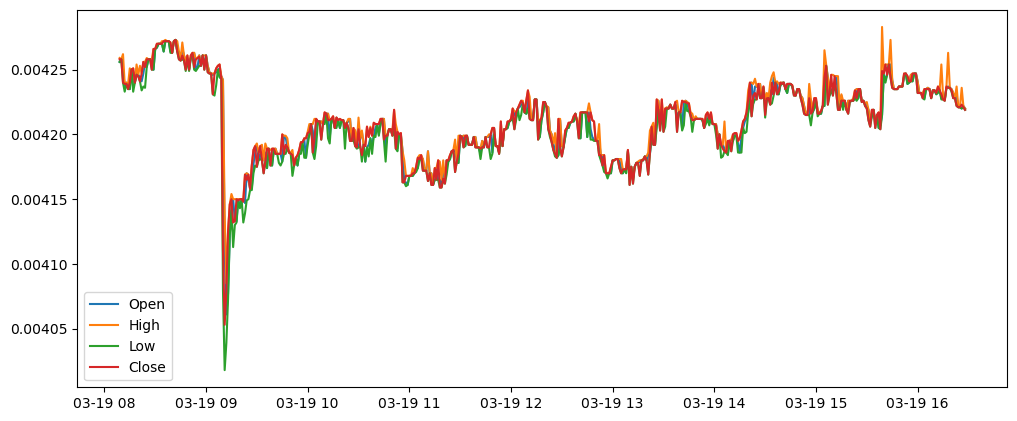

In [4]:
from matplotlib.pyplot import legend
from matplotlib import pylab
data_0 = data[['Open', 'High', 'Low', 'Close']]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)
plt.legend(line, data_0.columns)

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'QAV',
       'No. Trades', 'Taker BBAV', 'Taker BQAV', 'Ignore'],
      dtype='object')

In [6]:
close = data['Close']

### 5.2.10. MACD - Moving Average Convergence/Divergence

In [7]:
macd, macdsignal, macdhist = talib.MACDEXT(close, fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)

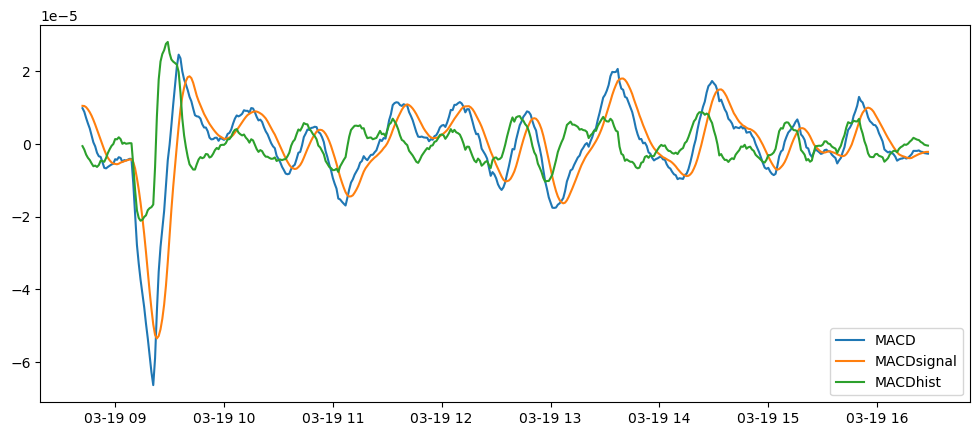

In [8]:
#Bordas de Boillinger
data_MACD = pd.DataFrame({"MACD": macd, "MACDsignal":macdsignal, "MACDhist":macdhist})

data_0 = data_MACD[["MACD", "MACDsignal", "MACDhist"]]
plt.figure(figsize=(12,5), dpi=100)
line = plt.plot(data.index, data_0)


# #Preço
# data_p = pd.DataFrame()
# data_p['Close'] = data['Close']
# line_p = plt.plot(data_p.index, data_p)
# plt.legend(line_p, data_p.columns)

plt.legend(line, data_0.columns)

plt.show()

#### Dataframe

In [9]:
df_MACD = pd.DataFrame()
for i in range(len(data)):
    df_MACD = df_MACD.append({"Close": data['Close'][i], "MACD": macd[i], "MACDsignal":macdsignal[i], "MACDhist":macdhist[i]}, ignore_index = True)

In [10]:
df_MACD_drop = df_MACD.dropna().reset_index(drop = True)
df_MACD_drop

,Close,MACD,MACDhist,MACDsignal
0,0.0042730000,0.0000097756,-0.0000006417,0.0000104174
1,0.0042640000,0.0000087756,-0.0000015954,0.0000103711
2,0.0042580000,0.0000070833,-0.0000029651,0.0000100484
3,0.0042570000,0.0000055769,-0.0000038561,0.0000094330
4,0.0042610000,0.0000042115,-0.0000044615,0.0000086731
...,...,...,...,...
462,0.0042210000,-0.0000021538,0.0000005135,-0.0000026674
463,0.0042210000,-0.0000022372,0.0000002286,-0.0000024658
464,0.0042230000,-0.0000025577,-0.0000002393,-0.0000023184
465,0.0042210000,-0.0000026346,-0.0000003989,-0.0000022358


#### Loop de descisão de compra com MACD